In [17]:
print("hello DLMI")

hello DLMI


In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_niblack, threshold_sauvola

In [19]:
dataset_path = "DRIVE"

images_path = os.path.join(dataset_path, "training", "images")
masks_path = os.path.join(dataset_path, "training", "1st_manual")

In [20]:
images = []
masks = []

image_files = sorted(os.listdir(images_path))
mask_files = sorted(os.listdir(masks_path))

for img_file, mask_file in zip(image_files, mask_files):
    img = cv2.imread(os.path.join(images_path, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    mask = cv2.imread(os.path.join(masks_path, mask_file), 0)
    
    images.append(img)
    masks.append(mask)

print("Total images loaded:", len(images))

Total images loaded: 20


In [21]:
images = []
masks = []

image_files = sorted(os.listdir(images_path))
mask_files = sorted(os.listdir(masks_path))

for img_file, mask_file in zip(image_files, mask_files):
    img = cv2.imread(os.path.join(images_path, img_file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    mask = cv2.imread(os.path.join(masks_path, mask_file), 0)
    
    images.append(img)
    masks.append(mask)

print("Total images loaded:", len(images))

Total images loaded: 20


In [22]:
def niblack_segmentation(img):
    thresh = threshold_niblack(img, window_size=25, k=0.2)
    binary = img > thresh
    return binary.astype(np.uint8)

def sauvola_segmentation(img):
    thresh = threshold_sauvola(img, window_size=25)
    binary = img > thresh
    return binary.astype(np.uint8)

In [23]:
def sensitivity(pred, gt):
    pred = pred.astype(bool)
    gt = gt.astype(bool)
    
    TP = np.logical_and(pred, gt).sum()
    FN = np.logical_and(~pred, gt).sum()
    
    if TP + FN == 0:
        return 0
    
    return TP / (TP + FN)

In [24]:
niblack_sens = []
sauvola_sens = []

for img, mask in zip(images, masks):
    
    # ground truth vessels are white (255)
    gt = mask > 0
    
    niblack_pred = niblack_segmentation(img)
    sauvola_pred = sauvola_segmentation(img)
    
    niblack_sens.append(sensitivity(niblack_pred, gt))
    sauvola_sens.append(sensitivity(sauvola_pred, gt))

print("Average Niblack Sensitivity:", np.mean(niblack_sens))
print("Average Sauvola Sensitivity:", np.mean(sauvola_sens))

Average Niblack Sensitivity: 0.20888120480047076
Average Sauvola Sensitivity: 0.9447717108957127


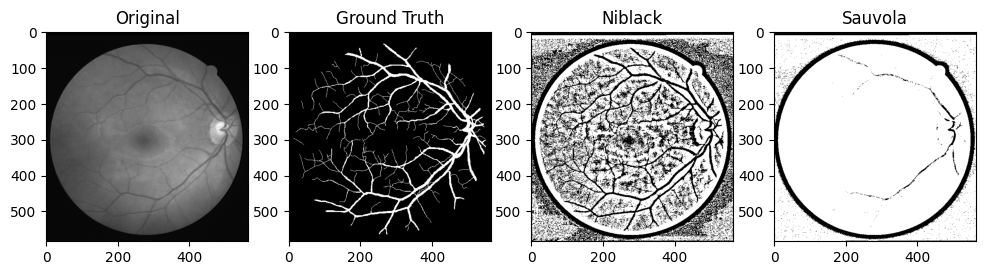

In [25]:
index = 8 # I took it for example

plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(images[index], cmap='gray')
plt.title("Original")

plt.subplot(1,4,2)
plt.imshow(masks[index], cmap='gray')
plt.title("Ground Truth")

plt.subplot(1,4,3)
plt.imshow(niblack_segmentation(images[index]), cmap='gray')
plt.title("Niblack")

plt.subplot(1,4,4)
plt.imshow(sauvola_segmentation(images[index]), cmap='gray')
plt.title("Sauvola")

plt.show()